In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [17]:
import os

In [37]:
angry = []
for i in range(3993):
    angry.append(np.array(load_img("images/train/angry/"+
                  os.listdir("images/train/angry")[i])))
disgust = []
for i in range(436):
    disgust.append(np.array(load_img("images/train/disgust/"+
                  os.listdir("images/train/disgust")[i])))
fear = []
for i in range(4103):
    fear.append(np.array(load_img("images/train/fear/"+
                  os.listdir("images/train/fear")[i])))
happy = []
for i in range(7164):
    happy.append(np.array(load_img("images/train/happy/"+
                  os.listdir("images/train/happy")[i])))
neutral = []
for i in range(4982):
    neutral.append(np.array(load_img("images/train/neutral/"+
                  os.listdir("images/train/neutral")[i])))
sad = []
for i in range(4938):
    sad.append(np.array(load_img("images/train/sad/"+
                  os.listdir("images/train/sad")[i])))
surprice = []
for i in range(3205):
    surprice.append(np.array(load_img("images/train/surprise/"+
                  os.listdir("images/train/surprise")[i])))

In [38]:
angry = np.array(angry)
disgust = np.array(disgust)
fear = np.array(fear)
neutral = np.array(neutral)
sad = np.array(sad)
surprice = np.array(surprice)

In [39]:
angry.shape, disgust.shape , fear.shape , neutral.shape , sad.shape , surprice.shape

((3993, 48, 48, 3),
 (436, 48, 48, 3),
 (4103, 48, 48, 3),
 (4982, 48, 48, 3),
 (4938, 48, 48, 3),
 (3205, 48, 48, 3))

In [42]:
data = np.concatenate((angry, disgust,fear, neutral, sad, surprice),axis = 0)

In [43]:
data.shape

(21657, 48, 48, 3)

In [53]:
label = angry.shape[0]*[0] + disgust.shape[0]*[1] + fear.shape[0]*[2] + neutral.shape[0]*[3]+ sad.shape[0]*[4] + surprice.shape[0]*[5]
label = np.vstack(label)

In [58]:
label = label.reshape(21657)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test , y_train , y_test = train_test_split(data, label , test_size = 0.2)

In [62]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [63]:
x_train_gray = np.sum(x_train/3, axis = 3, keepdims = True)
x_test_gray = np.sum(x_test/3, axis = 3, keepdims = True)

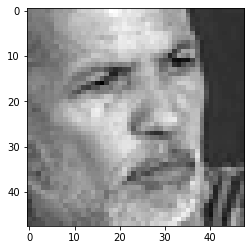

In [65]:
plt.imshow(x_train_gray[0], cmap="gray")

In [67]:
x_train_gray_norm = (x_train_gray - 128)/128
x_test_gray_norm = (x_test_gray - 128)/128

In [68]:
x_test_gray_norm.shape

(4332, 48, 48, 1)

In [88]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(8, (5,5), activation = 'relu', input_shape = (48,48,1)))
model.add(tf.keras.layers.AveragePooling2D())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(18, (5,5), activation = 'relu'))
model.add(tf.keras.layers.AveragePooling2D())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120, activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(84, activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(40, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(20, activation = 'relu'))
model.add(tf.keras.layers.Dense(6, activation = 'softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 44, 44, 8)         208       
_________________________________________________________________
average_pooling2d_10 (Averag (None, 22, 22, 8)         0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 22, 22, 8)         32        
_________________________________________________________________
dropout_11 (Dropout)         (None, 22, 22, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 18, 18, 18)        3618      
_________________________________________________________________
average_pooling2d_11 (Averag (None, 9, 9, 18)          0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 9, 9, 18)         

In [89]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [91]:
history = model.fit(x_train_gray_norm,
                 y_train, 
                 batch_size = 20,
                 epochs = 50,
                 validation_split=0.2)

Epoch 1/50
693/693 [==============================] - 28s 38ms/step - loss: 1.5937 - accuracy: 0.2977 - val_loss: 1.5264 - val_accuracy: 0.3483
Epoch 2/50
693/693 [==============================] - 27s 39ms/step - loss: 1.5578 - accuracy: 0.3229 - val_loss: 1.4826 - val_accuracy: 0.3763
Epoch 3/50
693/693 [==============================] - 27s 38ms/step - loss: 1.5239 - accuracy: 0.3492 - val_loss: 1.4557 - val_accuracy: 0.3968
Epoch 4/50
693/693 [==============================] - 19s 27ms/step - loss: 1.4955 - accuracy: 0.3667 - val_loss: 1.4302 - val_accuracy: 0.4087
Epoch 5/50
693/693 [==============================] - 19s 28ms/step - loss: 1.4628 - accuracy: 0.3881 - val_loss: 1.4044 - val_accuracy: 0.4162
Epoch 6/50
693/693 [==============================] - 19s 27ms/step - loss: 1.4482 - accuracy: 0.3975 - val_loss: 1.3740 - val_accuracy: 0.4329
Epoch 7/50
693/693 [==============================] - 18s 27ms/step - loss: 1.4232 - accuracy: 0.4089 - val_loss: 1.3516 - val_accuracy:

In [92]:
score = model.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

136/136 [==============================] - 1s 8ms/step - loss: 1.2297 - accuracy: 0.5083
Test Accuracy: 0.5083102583885193


In [93]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

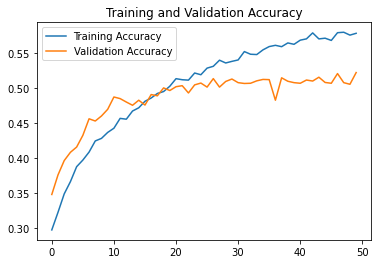

In [94]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy,  label='Training Accuracy')
plt.plot(epochs, val_accuracy,  label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()